**Check GPU availability**

In [1]:
import tensorflow as tf

rtx3060 = tf.config.list_physical_devices('GPU')
for num in rtx3060:
    tf.config.experimental.set_memory_growth(num, True)

print(rtx3060)

2022-11-17 15:34:19.218429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 15:34:19.574973: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 15:34:20.521534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/makima/miniconda3/envs/makima/lib/
2022-11-17 15:34:20.521633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_p

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-11-17 15:34:21.725234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 15:34:21.760030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 15:34:21.760294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


**Import libraries**

In [2]:
import matplotlib.image as img
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras
import cv2
import pathlib

**Create folder (If it does not exist yet)**

In [14]:

pfolder = "/home/makima/change-this-later/food-101/images"
ptext_train = "/home/makima/change-this-later/food-101/meta/train.txt" 
ptext_test = "/home/makima/change-this-later/food-101/meta/test.txt" 

data_dir = pathlib.Path(pfolder)
all_classes = len(list(data_dir.glob("*")))

"""Split the image into train and test"""
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print(data_dir,)
# ============= Run the fucntion ================================
prepare_data(ptext_train, data_dir, 'pic/trainer')
prepare_data(ptext_test, data_dir, 'pic/tester')
# The image will show at the working directory



Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying images into  croque_madam

**Choose the set of images to train**

In [15]:
def dataset_select(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

food_list = ['Apple_Pie','Baby_Back_Ribs','Baklava','Beef_Carpaccio','Beef_Tartare','Beet_Salad','Beignets','Bibimbap','Boopadpongali','Bread_Pudding','Breakfast_Burrito', 
             'Bruschetta','Caesar_Salad','Cannoli','Caprese_Salad','Carrot_Cake','Ceviche','Cheese_Plate','Cheesecake','Chicken_Curry','Chicken_Quesadilla','Chicken_Wings', 
             'Chocolate_Cake','Chocolate_Mousse','Churros','Clam_Chowder','Club_Sandwich','Crab_Cakes','Creme_Brulee','Croque_Madame','Cup_Cakes','Curriedfishcake', 
             'Deviled_Eggs','Donuts','Dumplings','Edamame','Eggs_Benedict','Eggsstewed','Escargots','Falafel','Filet_Mignon','Fish_And_Chips','Foie_Gras','French_Fries', 
             'French_Onion_Soup','French_Toast','Fried_Calamari','Fried_Rice','Friedkale','Frozen_Yogurt','Gaengjued','Gaengkeawwan','Garlic_Bread','Gnocchi','Goongobwoonsen', 
             'Goongpao','Greek_Salad','Grilled_Cheese_Sandwich','Grilled_Salmon','Grilledqquid','Guacamole','Gyoza','Hamburger','Hot_And_Sour_Soup','Hot_Dog','Hoykraeng',
             'Hoylaiprikpao','Huevos_Rancheros','Hummus','Ice_Cream','Joke','Kaithoon','Kaomangai','Kaomoodang','Khanomjeennamyakati','Khaomokgai','Khaomootodgratiem', 
             'Khaoniewmamuang','Kkaoklukkaphi','Kormooyang','Kuakling','Kuayjab','Kuayteowreua','Larbmoo','Lasagna','Lobster_Bisque','Lobster_Roll_Sandwich','Macaroni_And_Cheese', 
             'Macarons','Massamangai','Miso_Soup','Moosatay','Mussels','Nachos','Namtokmoo','Omelette','Onion_Rings','Oysters','Pad_Thai','Padpakbung','Padpakruammit', 
             'Paella','Pancakes','Panna_Cotta','Peking_Duck','Phatkaphrao','Pho','Pizza','Pork_Chop','Porkstickynoodles','Poutine','Prime_Rib','Pulled_Pork_Sandwich', 
             'Ramen','Ravioli','Red_Velvet_Cake','Risotto','Roast_Duck','Roast_Fish','Samosa','Sashimi','Scallops','Seaweed_Salad','Shrimp_And_Grits','Somtam', 
             'Soninlaweggs','Spaghetti_Bolognese','Spaghetti_Carbonara','Spring_Rolls','Steak','Stewedporkleg','Strawberry_Shortcake','Sushi','Tacos','Takoyaki', 
             'Tiramisu','Tomkhagai','Tomyumgoong','Tuna_Tartare','Waffles','Yamwoonsen','Yentafo']

# Please check that in your working directory have the these files or not. If not, please run the above section 
src_test = "pic/tester"
dst_test = "pic/split/test101"
src_train = "pic/trainer"
dst_train = "pic/split/train101"

dataset_select(food_list, src_train, dst_train)
dataset_select(food_list, src_test, dst_test)

train_folder = pathlib.Path("pic/split/train101/")
test_folder = pathlib.Path("pic/split/test101/")

Copying images into apple_pie
Copying images into baby_back_ribs
Copying images into baklava
Copying images into beef_carpaccio
Copying images into beef_tartare
Copying images into beet_salad
Copying images into beignets
Copying images into bibimbap
Copying images into bread_pudding
Copying images into breakfast_burrito
Copying images into bruschetta
Copying images into caesar_salad
Copying images into cannoli
Copying images into caprese_salad
Copying images into carrot_cake
Copying images into ceviche
Copying images into cheese_plate
Copying images into cheesecake
Copying images into chicken_curry
Copying images into chicken_quesadilla
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into chocolate_mousse
Copying images into churros
Copying images into clam_chowder
Copying images into club_sandwich
Copying images into crab_cakes
Copying images into creme_brulee
Copying images into croque_madame
Copying images into cup_cakes
Copying images into devile

**Parameters define**

In [3]:
n_classes = 142 #this one
img_width, img_height = 299, 299
train_data_dir = 'pic/split/train_multi/'
validation_data_dir = 'pic/split/test_multi'
nb_train_samples = 87464 #this one was 75750
nb_validation_samples = 26572 #and this one 25250
batch_size = 32

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

inception = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

predictions = tf.keras.layers.Dense(n_classes,kernel_regularizer=tf.keras.regularizers.l2(0.005), activation='softmax')(x)

model = tf.keras.models.Model(inputs=inception.input, outputs=predictions)
#model.summary()

Found 87464 images belonging to 142 classes.
Found 26572 images belonging to 142 classes.


2022-11-17 15:35:10.301630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 15:35:10.303032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 15:35:10.303504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 15:35:10.303895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

**Model training**

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if epoch >= 20 and logs.get("accuracy") is not None and logs.get("val_accuracy") >= 0.1:
            print("Model tends to be overfitting.Stop it.")
            self.model.stop_training = True
        elif logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print("Model tends to be overfitting.Stop it.")
            self.model.stop_training = True
callback = myCallback()

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='test/best_model_142class_20_x.hdf5', verbose=1, save_best_only=True)

csv_logger = tf.keras.callbacks.CSVLogger('history_142class_20_x.log')

history_54class = model.fit(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples // batch_size,
                    epochs=25,
                    verbose=1,
                    callbacks=[callback,csv_logger,checkpointer])
model.save('model_trained_142class_20_x.hdf5')

Epoch 1/25


2022-11-17 15:35:19.267137: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-17 15:35:20.725785: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-17 15:35:21.843991: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2733/2733 [==============================] - ETA: 0s - loss: 5.4734 - accuracy: 0.0343
Epoch 1: val_loss improved from inf to 5.09652, saving model to test/best_model_142class_20_x.hdf5
2733/2733 [==============================] - 1147s 415ms/step - loss: 5.4734 - accuracy: 0.0343 - val_loss: 5.0965 - val_accuracy: 0.1354
Epoch 2/25
2733/2733 [==============================] - ETA: 0s - loss: 4.8418 - accuracy: 0.1509
Epoch 2: val_loss improved from 5.09652 to 4.04027, saving model to test/best_model_142class_20_x.hdf5
2733/2733 [==============================] - 1119s 409ms/step - loss: 4.8418 - accuracy: 0.1509 - val_loss: 4.0403 - val_accuracy: 0.3200
Epoch 3/25
2733/2733 [==============================] - ETA: 0s - loss: 4.0754 - accuracy: 0.2718
Epoch 3: val_loss improved from 4.04027 to 3.19082, saving model to test/best_model_142class_20_x.hdf5
2733/2733 [==============================] - 1120s 410ms/step - loss: 4.0754 - accuracy: 0.2718 - val_loss: 3.1908 - val_accuracy: 0.458

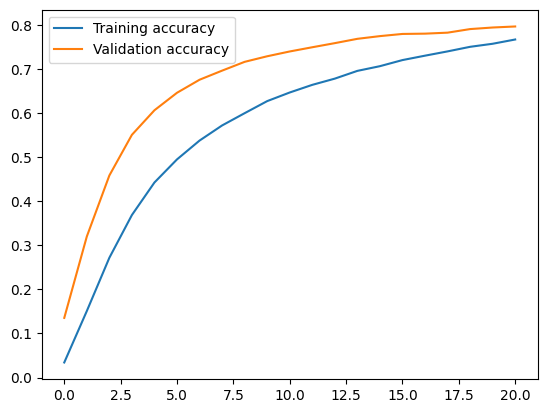

In [7]:
acc = history_54class.history["accuracy"]
val_acc = history_54class.history["val_accuracy"]

epochs = range(21)
plt.plot(epochs,acc,label="Training accuracy")
plt.plot(epochs,val_acc,label="Validation accuracy")
plt.legend()
plt.show()

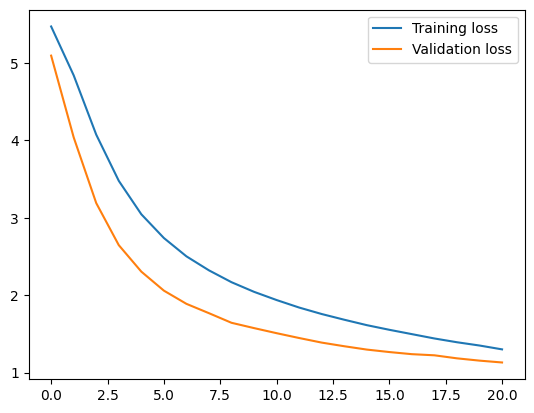

In [8]:
loss = history_54class.history["loss"]
val_loss = history_54class.history["val_loss"]

epochs = range(21)
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.legend()
plt.show()